# Prompt 

Dame un diseño, para evaluar de manera manuscrita, a mis estudiantes del curso de Análisis Numérico sobre los temas de "Interpolación lineal y cuadrática, regresión lineal y cuadrática y diferenciación numérica". El parcial debe tener 5 puntos y con un nivel profesional para evaluar a futuros docentes de matemáticas de la Universidad de Antioquia. Diséñamelo, de tal manera que los datos de cada punto, se le indique a cada estudiante, como generarlos a partir de su documento de identidad, para evitar problemas de fraude durante la realización del parcial de dos horas.   



# Universidad de Antioquia – Seccional Bajo Cauca  
### Programa: Ingeniería Agropecuaria  
### Curso: Matemáticas Aplicadas al Procesamiento de Datos  
### Docente: Marco Julio Cañas  
### Parcial 3 - Interpolación, Regresión y Derivación Numérica  
**Duración:** 120 minutos  
**Nombre del estudiante:** ___________________________  
**Fecha:** ______________________

---



### **Temas evaluados**
1. Interpolación lineal y cuadrática  
2. Regresión lineal y cuadrática  
3. Derivación numérica: conceptos y métodos básicos  


## **Punto 1. Teórico (20%) — Falso o Verdadero con justificación corta**

Marque **V** si la afirmación es verdadera o **F** si es falsa, y **justifique brevemente** su respuesta (1 o 2 líneas).

1. (   ) La interpolación busca ajustar un modelo que **minimiza los errores** entre los datos y la curva ajustada.  
2. (   ) En la interpolación cuadrática se requiere **al menos tres puntos** distintos para definir el polinomio.  
3. (   ) En una regresión lineal, el objetivo principal es que el modelo **pase exactamente por los datos observados**.  
4. (   ) La derivada numérica por diferencias hacia adelante se basa en el valor de la función **en el punto y en un punto posterior**.  
5. (   ) Si una función es suave, las derivadas numéricas calculadas por diferencias centradas son **más precisas** que las hacia adelante o hacia atrás.  

_Responda aquí:_  


## **Punto 2. Interpolación lineal y cuadrática (20%)**

| Mes (x) | Producción (y) |
|----------|----------------|
| 1 | 22 |
| 4 | 35 |
| 6 | 47 |


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

x = np.array([1, 4, 6])
y = np.array([22, 35, 47])

interp_lin = interp1d(x, y, kind='linear')
interp_quad = interp1d(x, y, kind='quadratic')

y3_lin = interp_lin(3)
y5_quad = interp_quad(5)

print(f"Interpolación lineal en x=3: {y3_lin:.2f}")
print(f"Interpolación cuadrática en x=5: {y5_quad:.2f}")

## **Punto 3. Regresión lineal y cuadrática (20%)**

| Fertilizante (x) | Rendimiento (y) |
|------------------|-----------------|
| 10 | 3.1 |
| 20 | 3.6 |
| 30 | 4.0 |
| 40 | 4.5 |
| 50 | 4.8 |


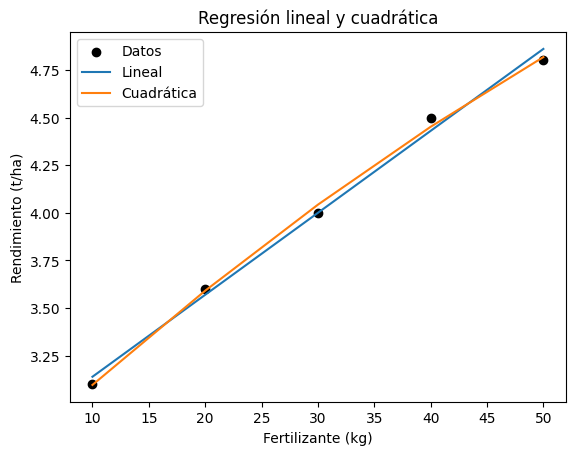

Modelo lineal:  
0.043 x + 2.71
Modelo cuadrático:             2
-0.0002143 x + 0.05586 x + 2.56


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([10, 20, 30, 40, 50])
y = np.array([3.1, 3.6, 4.0, 4.5, 4.8])

coef_lin = np.polyfit(x, y, 1)
coef_quad = np.polyfit(x, y, 2)

p_lin = np.poly1d(coef_lin)
p_quad = np.poly1d(coef_quad)

plt.scatter(x, y, label="Datos", color='black')
plt.plot(x, p_lin(x), label="Lineal")
plt.plot(x, p_quad(x), label="Cuadrática")
plt.legend()
plt.title("Regresión lineal y cuadrática")
plt.xlabel("Fertilizante (kg)")
plt.ylabel("Rendimiento (t/ha)")
plt.savefig(r"C:\Users\marco\Downloads\regresion.png")
plt.show()

print("Modelo lineal:", p_lin)
print("Modelo cuadrático:", p_quad)

## **Punto 4. Derivación numérica (20%)**

| x | f(x) |
|---|------|
| 0 | 1.0 |
| 0.5 | 1.65 |
| 1.0 | 2.72 |
| 1.5 | 4.48 |


In [3]:
x = np.array([0, 0.5, 1.0, 1.5])
f = np.array([1.0, 1.65, 2.72, 4.48])
h = x[1] - x[0]

fwd = (f[2] - f[1]) / h
ctr = (f[3] - f[1]) / (2*h)

print(f"Derivada hacia adelante en x=0.5: {fwd:.3f}")
print(f"Derivada centrada en x=1.0: {ctr:.3f}")

Derivada hacia adelante en x=0.5: 2.140
Derivada centrada en x=1.0: 2.830


## **Punto 5. Ejercicio de aplicación integrada (20%)**

| Día (x) | Temperatura (°C) | Crecimiento (cm/día) |
|----------|------------------|----------------------|
| 1 | 25 | 2.1 |
| 2 | 27 | 2.6 |
| 3 | 30 | 3.0 |
| 4 | 33 | 3.4 |
| 5 | 35 | 3.8 |


In [2]:
import numpy as np 
from scipy.interpolate import interp1d 

x = np.array([25, 27, 30, 33, 35])
y = np.array([2.1, 2.6, 3.0, 3.4, 3.8])

interp_quad = interp1d(x, y, kind='quadratic')
y31 = interp_quad(31)

coef_lin = np.polyfit(x, y, 1)
p_lin = np.poly1d(coef_lin)

dy_dx = (y[3] - y[1]) / (x[3] - x[1])

print(f"Crecimiento interpolado a 31°C: {y31:.2f} cm/día")
print(f"Modelo lineal: {p_lin}")
print(f"Derivada centrada ≈ {dy_dx:.3f} cm/día/°C")

Crecimiento interpolado a 31°C: 3.12 cm/día
Modelo lineal:  
0.1603 x - 1.829
Derivada centrada ≈ 0.133 cm/día/°C


## **Autoevaluación computacional**

In [7]:
assert abs(y3_lin - 29.0) < 1.0, "Verifique la interpolación lineal."
assert abs(y5_quad - 44.0) < 1.5, "Verifique la interpolación cuadrática."
assert abs(fwd - 2.14) < 0.3, "Verifique la derivada hacia adelante."
assert abs(ctr - 2.83) < 0.3, "Verifique la derivada centrada."
print("✅ Autoevaluación superada: los resultados son coherentes.")

NameError: name 'y3_lin' is not defined